# Analysis of the results of the DCT study

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Constants

In [2]:
results_path = "dct_study_results.csv"

### Loading the data

In [3]:
data = pd.read_csv(results_path)

### Results analysis

#### Dataset visualization

In [4]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
data

,Color,Block size,Num. coeffs,Distance measure,Feature vec. dim.,MAP@1,MAP@5
0,gray,256,64,L1,64.0,0.933333,0.940000
1,gray,256,64,L2,64.0,0.733333,0.773333
2,gray,256,64,Cosine,64.0,0.966667,0.966667
3,gray,256,64,Pearson,64.0,0.966667,0.966667
4,gray,256,32,L1,32.0,0.866667,0.900000
...,...,...,...,...,...,...,...
355,V,8,8,Pearson,8192.0,0.966667,0.966667
356,V,8,4,L1,4096.0,0.833333,0.841667
357,V,8,4,L2,4096.0,0.833333,0.841667
358,V,8,4,Cosine,4096.0,0.966667,0.983333


#### Sort by MAP@1 and MAP@5

In [6]:
data.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False]).head(n=40).reset_index(drop=True)

,Color,Block size,Num. coeffs,Distance measure,Feature vec. dim.,MAP@1,MAP@5
0,gray,64,64,Cosine,1024.0,1.000000,1.000000
1,gray,64,64,Pearson,1024.0,1.000000,1.000000
2,gray,32,32,Cosine,2048.0,1.000000,1.000000
3,gray,32,32,Pearson,2048.0,1.000000,1.000000
4,gray,32,16,Cosine,1024.0,1.000000,1.000000
5,gray,32,16,Pearson,1024.0,1.000000,1.000000
6,gray,16,8,Cosine,2048.0,1.000000,1.000000
7,gray,16,8,Pearson,2048.0,1.000000,1.000000
8,gray,16,4,Cosine,1024.0,1.000000,1.000000
9,gray,16,4,Pearson,1024.0,1.000000,1.000000


- All the parameter combinations with perfect MAP@1 and MAP@5 all have 1024 or 2048 feature vector dimensions.
- Also, they all have either Pearson or Cosine distance measures.

#### Number of combinations with perfect metrics

In [7]:
# Filter the dataset
perfect_results = data[(data['MAP@1'] == 1.0) & (data['MAP@5'] == 1.0)]

# Calculate the absolute number and percentage
absolute_count = perfect_results.shape[0]
total_count = data.shape[0]
percentage = (absolute_count / total_count) * 100

absolute_count, percentage

(30, 8.333333333333332)

- 30 out of the 360 parameter combinations (or 8.33%) have obtained perfect metrics. 

#### Distribution of MAP@1 and MAP@5 scores

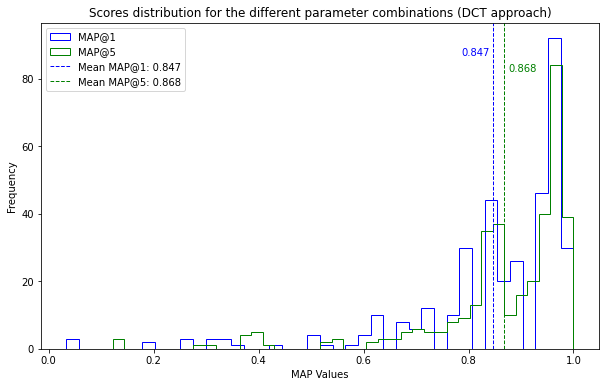

In [11]:
plt.figure(figsize=(10, 6))

# Plot MAP@1
plt.hist(data['MAP@1'], bins=40, histtype='step', linewidth=1, label='MAP@1', color='blue')

# Plot MAP@5
plt.hist(data['MAP@5'], bins=40, histtype='step', linewidth=1, label='MAP@5', color='green')

# Calculate means
mean_map1 = data['MAP@1'].mean()
mean_map5 = data['MAP@5'].mean()

# Plot vertical lines for the means
plt.axvline(mean_map1, color='blue', linestyle='--', linewidth=1, label=f'Mean MAP@1: {mean_map1:.3f}')
plt.axvline(mean_map5, color='green', linestyle='--', linewidth=1, label=f'Mean MAP@5: {mean_map5:.3f}')

# Add text for the means
plt.text(mean_map1-0.035, plt.ylim()[1] * 0.9, f'{mean_map1:.3f}', color='blue', ha='center')
plt.text(mean_map5+0.035, plt.ylim()[1] * 0.85, f'{mean_map5:.3f}', color='green', ha='center')

# Labels and title
plt.xlabel('MAP Values')
plt.ylabel('Frequency')
plt.title('Scores distribution for the different parameter combinations (DCT approach)')
plt.legend()

# Display the plot
plt.savefig("figs/score_distribution_DCT.jpg")
plt.show()

- The mean values of MAP@1 and MAP@5 across all combinations are 0.847 and 0.868 respectively.
- The distribution of scores is skewed, many scores being very high and some of them being very low.

#### Sorting by worst scores

In [53]:
data.sort_values(by=['MAP@1', 'MAP@5'], ascending=[True, True]).head(n=20).reset_index(drop=True)

,Color,Block size,Num. coeffs,Distance measure,Feature vec. dim.,MAP@1,MAP@5
0,V,256,4,Pearson,4.0,0.033333,0.122222
1,gray,256,4,Pearson,4.0,0.033333,0.125000
2,L,256,4,Pearson,4.0,0.033333,0.134444
3,V,256,4,L2,4.0,0.200000,0.283333
4,V,256,4,L1,4.0,0.200000,0.313333
5,V,256,4,Cosine,4.0,0.266667,0.387222
6,L,256,4,Cosine,4.0,0.266667,0.395000
7,gray,256,4,Cosine,4.0,0.266667,0.414444
8,gray,256,4,L1,4.0,0.300000,0.378889
9,gray,256,4,L2,4.0,0.300000,0.380000


- Most worst scores have either very low dimension (4 or 8) or very high dimension (65536 or 32768) feature vectors.
- L1 and L2 are also common in the top worst results.

#### Mean score grouping by Color

In [54]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Color')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Color,,,,
V,0.849722,0.870801,0.558843,0.734786
L,0.847778,0.868250,0.328731,0.439693
gray,0.845000,0.864449,0.000000,0.000000


- The different color spaces tested do not seem to affect the results significatively.
- The best color space is V and the worst gray.
- The best method (V) is only 0.6% better in MAP@1 and 0.7% better in MAP@5 than the worst method (gray)

#### Mean score grouping by block size

In [55]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Block size')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Block size,,,,
32,0.914444,0.925250,33.821138,26.712824
64,0.907778,0.919463,32.845528,25.920290
16,0.886667,0.902407,29.756098,23.584535
128,0.866667,0.881926,26.829268,20.779600
8,0.826111,0.847759,20.894309,16.100481
256,0.683333,0.730194,0.000000,0.000000


- There are significant different between different block sizes.
- The best block sizes seem to be intermediate ones (32 or 64).
- The worst block sizes seem to be the extreme ones (256 or 8).
- The best block size (32) is 33.8% better than the worst block size (256).

#### Mean score grouping by number of coefficients

In [56]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Num. coeffs')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Num. coeffs,,,,
32,0.883333,0.899568,16.840171,14.407961
16,0.882870,0.898410,16.778934,14.260760
64,0.868056,0.883526,14.819351,12.367765
8,0.847222,0.871381,12.063686,10.823144
4,0.756019,0.786281,0.000000,0.000000


- Some differences are observed in number of coefficients used, especially when comparing 4 to the others, showing that 4 might be too little to capture all the relevant information.
- The differences between the 8, 16, 32 and 64 are not very significant.
- The best number of coefficients (32) is 16.8% better than the worst number of coefficients (4).

#### Mean score grouping by distance measure

In [57]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Distance measure')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Distance measure,,,,
Cosine,0.931481,0.944327,23.405299,20.736029
Pearson,0.917778,0.931519,21.589794,19.098392
L1,0.785926,0.813346,4.121688,3.989519
L2,0.754815,0.782142,0.000000,0.000000


- Cosine and Pearson perform significantly better than L1 and L2, with a 20% difference approximately between them.
- The best distance measure, although not by much, is Cosine.

#### Visualizing the variance in the results by distance

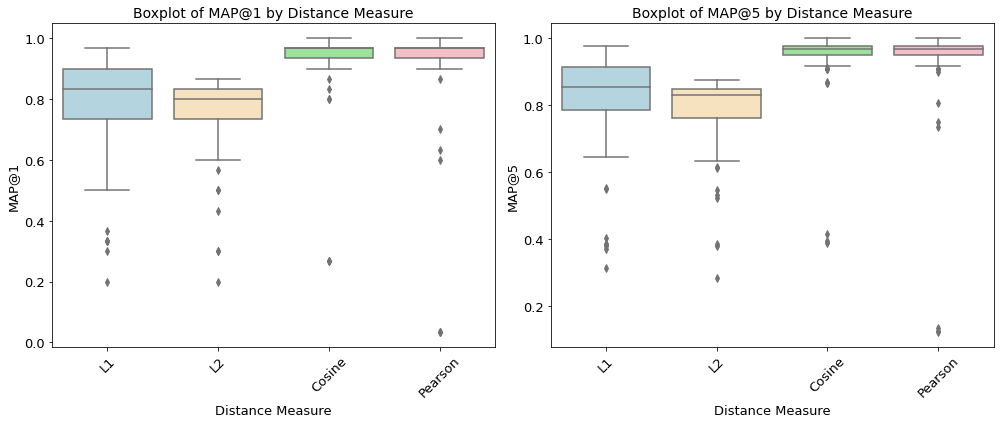

In [82]:
plt.figure(figsize=(14, 6))

custom_palette = {
    'L1': 'lightblue',
    'L2': 'moccasin',
    'Cosine': 'lightgreen',
    'Pearson': 'lightpink'
}

# Boxplot for MAP@1 by Distance measure
plt.subplot(1, 2, 1)
sns.boxplot(x='Distance measure', y='MAP@1', data=data, palette=custom_palette)
plt.title('Boxplot of MAP@1 by Distance Measure', fontsize=14)
plt.xlabel('Distance Measure', fontsize=13)
plt.ylabel('MAP@1', fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)

# Boxplot for MAP@5 by Distance measure
plt.subplot(1, 2, 2)
sns.boxplot(x='Distance measure', y='MAP@5', data=data, palette=custom_palette)
plt.title('Boxplot of MAP@5 by Distance Measure', fontsize=14)
plt.xlabel('Distance Measure', fontsize=13)
plt.ylabel('MAP@5', fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()

#### Mean score grouping by feature vector dimension

In [58]:
# Calculate the mean MAP@1 and MAP@5, grouping by a feature
mean_grouped = data.groupby('Feature vec. dim.')[['MAP@1', 'MAP@5']].mean()

# Sort the results by 'MAP@1' and then by 'MAP@5' in descending order
sorted_mean = mean_grouped.sort_values(by=['MAP@1', 'MAP@5'], ascending=[False, False])

# Calculate the percentage improvement with respect to the worst method (minimum MAP@1 and MAP@5)
min_map1 = sorted_mean['MAP@1'].min()
min_map5 = sorted_mean['MAP@5'].min()
sorted_mean['Improvement_MAP@1 (%)'] = ((sorted_mean['MAP@1'] - min_map1) / min_map1) * 100
sorted_mean['Improvement_MAP@5 (%)'] = ((sorted_mean['MAP@5'] - min_map5) / min_map5) * 100

sorted_mean

,MAP@1,MAP@5,Improvement_MAP@1 (%),Improvement_MAP@5 (%)
Feature vec. dim.,,,,
1024.0,0.932407,0.940293,341.666667,203.139303
512.0,0.922222,0.934167,336.842105,201.164179
2048.0,0.920833,0.932639,336.184211,200.671642
256.0,0.916667,0.926790,334.210526,198.786070
128.0,0.905556,0.914838,328.947368,194.932836
4096.0,0.891667,0.906219,322.368421,192.154229
64.0,0.885185,0.898102,319.298246,189.537313
8192.0,0.876389,0.892338,315.131579,187.679104
32.0,0.844444,0.868333,300.000000,179.940299


- The best results use intermediate feature vector dimensions, such as 256, 512, 1024 or 2048.
- The worst results use extreme feature vector dimensions, such as 4, 8, 32768 or 65536.
- 4 dimensional feature vector perform significantly worse than others.

#### Plotting MAP values along feature vector dimension

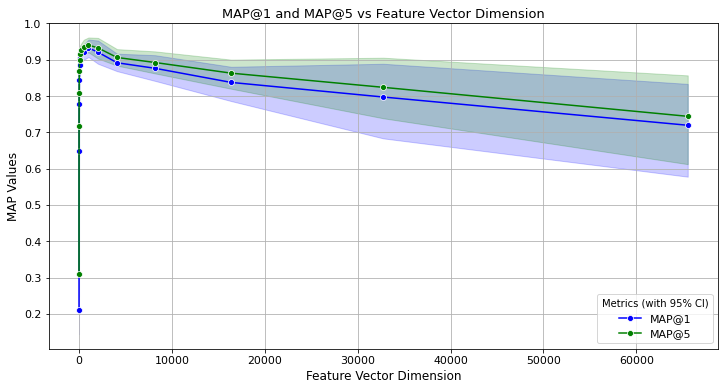

In [16]:
plt.figure(figsize=(12, 6))

# Plot MAP@1 vs Feature Vector Dimension
sns.lineplot(data=data, x='Feature vec. dim.', y='MAP@1', marker='o', label='MAP@1', color='blue')

# Plot MAP@5 vs Feature Vector Dimension
sns.lineplot(data=data, x='Feature vec. dim.', y='MAP@5', marker='o', label='MAP@5', color='green')

# Labels and title
plt.title('MAP@1 and MAP@5 vs Feature Vector Dimension', fontsize=13)
plt.xlabel('Feature Vector Dimension', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('MAP Values', fontsize=12)
plt.legend(title="Metrics (with 95% CI)", loc="lower right", fontsize=11)
plt.grid(True)

plt.savefig("figs/dimension_comparison_DCT.jpg")
plt.show()

### Choosing the best combination

We have seen that:
- V color seems to be the best on average by a small difference.
- Cosine and Pearson distnances are significantly better on average, Cosine being even better than Pearson by a small difference.
- 32 block size performs on average better than others.
- 32 number of coefficients performs on average better than others.
- Even though the previous combination results in 2048-dimensional feature vectors, 1024-dimensional feature vectors seem to perform better on average.

Considering the previous analysis, the following combinations (with perfect metrics in both MAP@1 and MAP@5), might be the best:
- V color with Cosine similarity, 64 block size, 64 coefficients per block (1024 dim.)
- V color with Cosine similarity, 32 block size, 16 coefficients per block (1024 dim.)
- V color with Cosine similarity, 16 block size, 4 coefficients per block (1024 dim.)

Nevertheless, this study has been performed with clean images (cropped and without noise), so these combinations might not generalize perfectly, and other, less dimensional combinations might work better.